In [7]:
import keras
from keras.layers import Dense
from keras.models import Sequential
import sklearn.preprocessing
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import os
import sys
sys.path.append('../src/')
# Project modules
import get_modeling_data
import model_evaluation.model_performance_functions as mpf
import features.win_rates as wr
import data_constants as dc
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = get_modeling_data.get_train()
validation = get_modeling_data.get_validation()
train = train.fillna(0)
validation = validation.fillna(0)
non_modeling_cols = get_modeling_data.get_non_modeling_cols()
X_train = train.drop(['team_100_win'], axis=1)
Y_train = train['team_100_win']
X_validation = validation.drop(['team_100_win'], axis=1)
Y_validation = validation['team_100_win']

In [3]:
print(X_train.shape)
print(X_validation.shape)

(171284, 169)
(57093, 169)


In [44]:
X_train.columns

Index(['100_TOP_SOLO_wr', '100_MIDDLE_SOLO_wr', '100_BOTTOM_DUO_CARRY_wr',
       '100_BOTTOM_DUO_SUPPORT_wr', '100_JUNGLE_NONE_wr', '200_TOP_SOLO_wr',
       '200_MIDDLE_SOLO_wr', '200_BOTTOM_DUO_CARRY_wr',
       '200_BOTTOM_DUO_SUPPORT_wr', '200_JUNGLE_NONE_wr',
       ...
       '100_BOTTOM_DUO_SUPPORT_JUNGLE_NONE_wr',
       '200_BOTTOM_DUO_SUPPORT_JUNGLE_NONE_wr', '100_JUNGLE_NONE_TOP_SOLO_wr',
       '200_JUNGLE_NONE_TOP_SOLO_wr', '100_JUNGLE_NONE_MIDDLE_SOLO_wr',
       '200_JUNGLE_NONE_MIDDLE_SOLO_wr', '100_JUNGLE_NONE_BOTTOM_DUO_CARRY_wr',
       '200_JUNGLE_NONE_BOTTOM_DUO_CARRY_wr',
       '100_JUNGLE_NONE_BOTTOM_DUO_SUPPORT_wr',
       '200_JUNGLE_NONE_BOTTOM_DUO_SUPPORT_wr'],
      dtype='object', length=155)

In [45]:
model = Sequential()
model.add(Dense(40, activation='sigmoid', input_shape=(X_train.shape[1],)))
model.add(Dense(20, activation='sigmoid'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, Y_train)
train_pred = model.predict(X_train)
print("Train performance: " + str(mpf.ks_gini(Y_train, train_pred[:,0])))
print("Train accuracy: " + str(mpf.correct_prediction_rate(Y_train, train_pred[:,0])))
valid_pred = model.predict(X_validation)
print("Validation performance: " + str(mpf.ks_gini(Y_validation, valid_pred[:,0])))
print("Validation accuracy: " + str(mpf.correct_prediction_rate(Y_validation, valid_pred[:,0])))

Epoch 1/1
171284/171284 [==============================] - 11s 65us/step - loss: 0.2521
Train performance: {'ks': 0.016751628722792677, 'gini': 0.012424682437483583}
Train accuracy: 0.49641531024497326
Validation performance: {'ks': 0.019167824129486644, 'gini': 0.013937962816447982}
Validation accuracy: 0.49394847004011


## What if I only use solo win rates?

In [46]:
solo_wr_cols = ['100_TOP_SOLO_wr', '100_MIDDLE_SOLO_wr', '100_BOTTOM_DUO_CARRY_wr',
       '100_BOTTOM_DUO_SUPPORT_wr', '100_JUNGLE_NONE_wr', '200_TOP_SOLO_wr',
       '200_MIDDLE_SOLO_wr', '200_BOTTOM_DUO_CARRY_wr',
       '200_BOTTOM_DUO_SUPPORT_wr', '200_JUNGLE_NONE_wr']

In [47]:
X_train2 = X_train[solo_wr_cols]
X_validation2 = X_validation[solo_wr_cols]

In [48]:
for num_nodes in range(15,20):
    print("Number of nodes: " + str(num_nodes))
    start_time = time.time()
    model = Sequential()
    model.add(Dense(num_nodes, activation='relu', input_shape=(X_train2.shape[1],)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train2, Y_train)
    train_pred = model.predict(X_train2)
    print("Train ks and gini: " + str(mpf.ks_gini(Y_train, train_pred[:,0])))
    valid_pred = model.predict(X_validation2)
    print("Train ks and gini: " + str(mpf.ks_gini(Y_validation, valid_pred[:,0])))
    training_time = time.time() - start_time
    print("Training time: " + str(training_time))

Number of nodes: 15
Epoch 1/1
171284/171284 [==============================] - 7s 42us/step - loss: 0.2516
Train ks and gini: {'ks': 0.013270064633952305, 'gini': -0.008912739040981282}
Train ks and gini: {'ks': 0.0054670989743592635, 'gini': -0.0030384736615479686}
Training time: 11.22303318977356
Number of nodes: 16
Epoch 1/1
171284/171284 [==============================] - 8s 46us/step - loss: 0.2510
Train ks and gini: {'ks': 0.01751192221056319, 'gini': -0.011503422141559768}
Train ks and gini: {'ks': 0.010041797818639564, 'gini': -0.004349692197727051}
Training time: 13.313497066497803
Number of nodes: 17
Epoch 1/1
171284/171284 [==============================] - 8s 45us/step - loss: 0.2517
Train ks and gini: {'ks': 0.0108516927992659, 'gini': -0.006580524149535116}
Train ks and gini: {'ks': 0.0040547927910451476, 'gini': -0.001218346633897774}
Training time: 12.246733665466309
Number of nodes: 18
Epoch 1/1
171284/171284 [==============================] - 8s 49us/step - loss: 0.25

## Solo win rates without Machine Learning

In [50]:
blue_side_total_wr_cols = ['100_TOP_SOLO_wr', '100_MIDDLE_SOLO_wr', '100_BOTTOM_DUO_CARRY_wr',
       '100_BOTTOM_DUO_SUPPORT_wr', '100_JUNGLE_NONE_wr']
red_side_total_wr_cols = ['200_TOP_SOLO_wr',
       '200_MIDDLE_SOLO_wr', '200_BOTTOM_DUO_CARRY_wr',
       '200_BOTTOM_DUO_SUPPORT_wr', '200_JUNGLE_NONE_wr']


In [51]:
X_train2['blue_total_wr'] = X_train2[blue_side_total_wr_cols].sum(axis=1)
X_train2['red_total_wr'] = X_train2[red_side_total_wr_cols].sum(axis=1)
X_train2['blue_side_bigger_wr'] = X_train2['blue_total_wr'] > X_train2['red_total_wr']

C:\Users\Albert\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Albert\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Albert\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pand

In [52]:
np.sum(X_train2['blue_side_bigger_wr'].astype(int) == Y_train) / X_train2.shape[0]

0.4968648560285841

## Paired Win Rates

In [4]:
paired_wr_cols = ['100_TOP_SOLO_MIDDLE_SOLO_wr', '200_TOP_SOLO_MIDDLE_SOLO_wr',
       '100_TOP_SOLO_BOTTOM_DUO_CARRY_wr', '200_TOP_SOLO_BOTTOM_DUO_CARRY_wr',
       '100_TOP_SOLO_BOTTOM_DUO_SUPPORT_wr',
       '200_TOP_SOLO_BOTTOM_DUO_SUPPORT_wr', '100_TOP_SOLO_JUNGLE_NONE_wr',
       '200_TOP_SOLO_JUNGLE_NONE_wr', '100_MIDDLE_SOLO_BOTTOM_DUO_CARRY_wr',
       '200_MIDDLE_SOLO_BOTTOM_DUO_CARRY_wr',
       '100_MIDDLE_SOLO_BOTTOM_DUO_SUPPORT_wr',
       '200_MIDDLE_SOLO_BOTTOM_DUO_SUPPORT_wr',
       '100_MIDDLE_SOLO_JUNGLE_NONE_wr', '200_MIDDLE_SOLO_JUNGLE_NONE_wr',
       '100_BOTTOM_DUO_CARRY_BOTTOM_DUO_SUPPORT_wr',
       '200_BOTTOM_DUO_CARRY_BOTTOM_DUO_SUPPORT_wr',
       '100_BOTTOM_DUO_CARRY_JUNGLE_NONE_wr',
       '200_BOTTOM_DUO_CARRY_JUNGLE_NONE_wr',
       '100_BOTTOM_DUO_SUPPORT_JUNGLE_NONE_wr',
       '200_BOTTOM_DUO_SUPPORT_JUNGLE_NONE_wr']

In [66]:
X_train3 = X_train[paired_wr_cols]
X_validation3 = X_validation[paired_wr_cols]

In [77]:
start_time = time.time()
model = Sequential()
model.add(Dense(20, activation='sigmoid', input_shape=(X_train3.shape[1],)))
model.add(Dense(5, activation='sigmoid', input_shape=(X_train3.shape[1],)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train3, Y_train)
train_pred = model.predict(X_train3)
print("Train ks and gini: " + str(mpf.ks_gini(Y_train, train_pred[:,0])))
print("Train accuracy: " + str(mpf.correct_prediction_rate(Y_train, train_pred[:,0])))
valid_pred = model.predict(X_validation3)
print("Validation ks and gini: " + str(mpf.ks_gini(Y_validation, valid_pred[:,0])))
print("Validation accuracy: " + str(mpf.correct_prediction_rate(Y_validation, valid_pred[:,0])))
training_time = time.time() - start_time
print("Training time: " + str(training_time))

Epoch 1/1
171284/171284 [==============================] - 13s 76us/step - loss: 0.2515
Train ks and gini: {'ks': 0.04191192612235667, 'gini': 0.02810120826338751}
Train accuracy: 0.5387601877583429
Validation ks and gini: {'ks': 0.04734207452667222, 'gini': 0.03194593766256729}
Validation accuracy: 0.5432890196696618
Training time: 19.49892282485962


In [79]:
thresholds = [(x + 45)/100 for x in range(10)]
for t in thresholds:
    print(t)
    print("Train accuracy: " + str(mpf.correct_prediction_rate(Y_train, train_pred[:,0], t)))
    print("Validation accuracy: " + str(mpf.correct_prediction_rate(Y_validation, valid_pred[:,0], t)))

0.45
Train accuracy: 0.49699329768104433
Validation accuracy: 0.4959452121976424
0.46
Train accuracy: 0.49938114476541884
Validation accuracy: 0.49822219886851277
0.47
Train accuracy: 0.5058207421592209
Validation accuracy: 0.5049130366244549
0.48
Train accuracy: 0.5211052988019896
Validation accuracy: 0.5244600914297725
0.49
Train accuracy: 0.5381179794960417
Validation accuracy: 0.5433415655159126
0.5
Train accuracy: 0.5387601877583429
Validation accuracy: 0.5432890196696618
0.51
Train accuracy: 0.527702529132902
Validation accuracy: 0.5317814793407247
0.52
Train accuracy: 0.518081081712244
Validation accuracy: 0.522831170195996
0.53
Train accuracy: 0.5128791947876042
Validation accuracy: 0.5168934895696495
0.54
Train accuracy: 0.5108358048621003
Validation accuracy: 0.5143012278212741


In [62]:
most_impt_lane_pairs = ['100_TOP_SOLO_MIDDLE_SOLO_wr', '200_TOP_SOLO_MIDDLE_SOLO_wr',
       '100_TOP_SOLO_JUNGLE_NONE_wr',
       '200_TOP_SOLO_JUNGLE_NONE_wr', 
       '100_MIDDLE_SOLO_JUNGLE_NONE_wr', '200_MIDDLE_SOLO_JUNGLE_NONE_wr',
       '100_BOTTOM_DUO_CARRY_BOTTOM_DUO_SUPPORT_wr',
       '200_BOTTOM_DUO_CARRY_BOTTOM_DUO_SUPPORT_wr',
       '100_BOTTOM_DUO_SUPPORT_JUNGLE_NONE_wr',
       '200_BOTTOM_DUO_SUPPORT_JUNGLE_NONE_wr']
X_train3a = X_train3[most_impt_lane_pairs]
X_validation3a = X_validation3[most_impt_lane_pairs]

In [63]:
start_time = time.time()
model = Sequential()
model.add(Dense(10, activation='sigmoid', input_shape=(X_train3a.shape[1],)))
model.add(Dense(8, activation='sigmoid'))
model.add(Dense(4, activation='sigmoid'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train3a, Y_train)
train_pred = model.predict(X_train3a)
print("Train ks and gini: " + str(mpf.ks_gini(Y_train, train_pred[:,0])))
print("Train accuracy: " + str(mpf.correct_prediction_rate(Y_train, train_pred[:,0])))
valid_pred = model.predict(X_validation3a)
print("Validation ks and gini: " + str(mpf.ks_gini(Y_validation, valid_pred[:,0])))
print("Validation accuracy: " + str(mpf.correct_prediction_rate(Y_validation, valid_pred[:,0])))
training_time = time.time() - start_time
print("Training time: " + str(training_time))

Epoch 1/1
171284/171284 [==============================] - 12s 69us/step - loss: 0.2500
Train ks and gini: {'ks': 0.03826417659963738, 'gini': 0.025217814967840223}
Train accuracy: 0.5099542280656687
Validation ks and gini: {'ks': 0.042826091288003965, 'gini': 0.028324283305312625}
Validation accuracy: 0.5125672148949959
Training time: 17.90878939628601


## H2H Win Rates

In [27]:
h2h_wr_cols = ['100_TOP_SOLO_200_TOP_SOLO_h2h_100_wr',
       '100_TOP_SOLO_200_MIDDLE_SOLO_h2h_100_wr',
       '100_TOP_SOLO_200_BOTTOM_DUO_CARRY_h2h_100_wr',
       '100_TOP_SOLO_200_BOTTOM_DUO_SUPPORT_h2h_100_wr',
       '100_TOP_SOLO_200_JUNGLE_NONE_h2h_100_wr',
       '100_MIDDLE_SOLO_200_TOP_SOLO_h2h_100_wr',
       '100_MIDDLE_SOLO_200_MIDDLE_SOLO_h2h_100_wr',
       '100_MIDDLE_SOLO_200_BOTTOM_DUO_CARRY_h2h_100_wr',
       '100_MIDDLE_SOLO_200_BOTTOM_DUO_SUPPORT_h2h_100_wr',
       '100_MIDDLE_SOLO_200_JUNGLE_NONE_h2h_100_wr',
       '100_BOTTOM_DUO_CARRY_200_TOP_SOLO_h2h_100_wr',
       '100_BOTTOM_DUO_CARRY_200_MIDDLE_SOLO_h2h_100_wr',
       '100_BOTTOM_DUO_CARRY_200_BOTTOM_DUO_CARRY_h2h_100_wr',
       '100_BOTTOM_DUO_CARRY_200_BOTTOM_DUO_SUPPORT_h2h_100_wr',
       '100_BOTTOM_DUO_CARRY_200_JUNGLE_NONE_h2h_100_wr',
       '100_BOTTOM_DUO_SUPPORT_200_TOP_SOLO_h2h_100_wr',
       '100_BOTTOM_DUO_SUPPORT_200_MIDDLE_SOLO_h2h_100_wr',
       '100_BOTTOM_DUO_SUPPORT_200_BOTTOM_DUO_CARRY_h2h_100_wr',
       '100_BOTTOM_DUO_SUPPORT_200_BOTTOM_DUO_SUPPORT_h2h_100_wr',
       '100_BOTTOM_DUO_SUPPORT_200_JUNGLE_NONE_h2h_100_wr',
       '100_JUNGLE_NONE_200_TOP_SOLO_h2h_100_wr',
       '100_JUNGLE_NONE_200_MIDDLE_SOLO_h2h_100_wr',
       '100_JUNGLE_NONE_200_BOTTOM_DUO_CARRY_h2h_100_wr',
       '100_JUNGLE_NONE_200_BOTTOM_DUO_SUPPORT_h2h_100_wr',
       '100_JUNGLE_NONE_200_JUNGLE_NONE_h2h_100_wr']

In [28]:
X_train4 = X_train[h2h_wr_cols]
X_validation4 = X_validation[h2h_wr_cols]

In [29]:
model = Sequential()
model.add(Dense(20, activation='sigmoid', input_shape=(X_train4.shape[1],)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train4, Y_train)
train_pred = model.predict(X_train4)
print("Train ks and gini: " + str(mpf.ks_gini(Y_train, train_pred[:,0])))
print("Train accuracy: " + str(mpf.correct_prediction_rate(Y_train, train_pred[:,0])))
valid_pred = model.predict(X_validation4)
print("Validation ks and gini: " + str(mpf.ks_gini(Y_validation, valid_pred[:,0])))
print("Validation accuracy: " + str(mpf.correct_prediction_rate(Y_validation, valid_pred[:,0])))
training_time = time.time() - start_time
print("Training time: " + str(training_time))

Epoch 1/1
171321/171321 [==============================] - 7s 42us/step - loss: 0.2223
Train ks and gini: {'ks': 0.17572353427916215, 'gini': 0.12714255751835002}
Train accuracy: 0.6717915491971211
Validation ks and gini: {'ks': 0.04414020518695616, 'gini': 0.027857866583537602}
Validation accuracy: 0.5410019787416603
Training time: 10.834827184677124


In [31]:
thresholds = [(x + 45)/100 for x in range(10)]
for t in thresholds:
    print("Train accuracy: " + str(mpf.correct_prediction_rate(Y_train, train_pred[:,0], t)))
    print("Validation accuracy: " + str(mpf.correct_prediction_rate(Y_validation, valid_pred[:,0], t)))

Train accuracy: 0.6487354148061242
Validation accuracy: 0.5287442870401177
Train accuracy: 0.6551911324356033
Validation accuracy: 0.5314584902026022
Train accuracy: 0.6609580845313767
Validation accuracy: 0.5334547428511391
Train accuracy: 0.6660537820815895
Validation accuracy: 0.5361514350254785
Train accuracy: 0.6693575218449577
Validation accuracy: 0.5388306162116728
Train accuracy: 0.6717915491971211
Validation accuracy: 0.5410019787416603
Train accuracy: 0.673338353149935
Validation accuracy: 0.5419825940777838
Train accuracy: 0.673455093070902
Validation accuracy: 0.5437336928922899
Train accuracy: 0.6714179814500265
Validation accuracy: 0.5427005445917313
Train accuracy: 0.6687154522796388
Validation accuracy: 0.542595478662861


## One Hot Encoding

In [91]:
lane_cols = ['100_TOP_SOLO', '100_JUNGLE_NONE', '100_MIDDLE_SOLO', '100_BOTTOM_DUO_CARRY', '100_BOTTOM_DUO_SUPPORT', '200_TOP_SOLO', '200_JUNGLE_NONE', '200_MIDDLE_SOLO', '200_BOTTOM_DUO_CARRY', '200_BOTTOM_DUO_SUPPORT']
X_train5 = X_train[lane_cols]
X_validation5 = X_validation[lane_cols]

champ_ids = dc.get_champs_four_letters()
champ_ids = dict(zip(champ_ids, champ_ids.index))

for i in cols_to_keep:
    X_train5[i] = X_train5[i].map(champ_ids)
    X_validation5[i] = X_validation5[i].map(champ_ids)

ohe = sklearn.preprocessing.OneHotEncoder(140)
X_train5 = ohe.fit_transform(X_train5)
X_validation5 = ohe.fit_transform(X_validation5)

C:\Users\Albert\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Albert\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [92]:
X_train5.shape

(171284, 1400)

In [106]:
model = Sequential()
model.add(Dense(200, activation='sigmoid', input_shape=(X_train5.shape[1],)))
model.add(Dense(50, activation='sigmoid'))
model.add(Dense(20, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train5, Y_train)
train_pred = model.predict(X_train5)
print("Train ks and gini: " + str(mpf.ks_gini(Y_train, train_pred[:,0])))
print("Train accuracy: " + str(mpf.correct_prediction_rate(Y_train, train_pred[:,0])))
valid_pred = model.predict(X_validation5)
print("Validation ks and gini: " + str(mpf.ks_gini(Y_validation, valid_pred[:,0])))
print("Validation accuracy: " + str(mpf.correct_prediction_rate(Y_validation, valid_pred[:,0])))

Epoch 1/1
171284/171284 [==============================] - 65s 379us/step - loss: 0.2488
Train ks and gini: {'ks': 0.060543076764375814, 'gini': 0.041808237995168224}
Train accuracy: 0.5500513766609841
Validation ks and gini: {'ks': 0.05459509559230841, 'gini': 0.03750410824657843}
Validation accuracy: 0.5411346399733767


In [105]:
thresholds = [.487255, .4873, .4874, .4875, .48753]
for t in thresholds:
    print("Train accuracy: " + str(mpf.correct_prediction_rate(Y_train, train_pred[:,0], t)))
    print("Validation accuracy: " + str(mpf.correct_prediction_rate(Y_validation, valid_pred[:,0], t)))

Train accuracy: 0.4942551551808692
Validation accuracy: 0.4919692431646612
Train accuracy: 0.4942551551808692
Validation accuracy: 0.4919692431646612
Train accuracy: 0.4963802807033932
Validation accuracy: 0.4937908325013574
Train accuracy: 0.511191938534831
Validation accuracy: 0.5143187431033577
Train accuracy: 0.5057448448191308
Validation accuracy: 0.5080132415532552


In [99]:
pd.Series(train_pred[:,0]).describe()

count    171284.000000
mean          0.487255
std           0.000208
min           0.487346
25%           0.487448
50%           0.487464
75%           0.487477
max           0.487526
dtype: float64

## Champ Indicators with Paired Win Rates

In [22]:
lane_cols = ['100_TOP_SOLO', '100_JUNGLE_NONE', '100_MIDDLE_SOLO', '100_BOTTOM_DUO_CARRY', '100_BOTTOM_DUO_SUPPORT', '200_TOP_SOLO', '200_JUNGLE_NONE', '200_MIDDLE_SOLO', '200_BOTTOM_DUO_CARRY', '200_BOTTOM_DUO_SUPPORT']
X_train6 = X_train[lane_cols + paired_wr_cols]
X_validation6 = X_validation[lane_cols + paired_wr_cols]
print(X_train6.shape)
champs = dc.get_champs_four_letters()

for champ in champs:
    X_train6[champ] = 0
    X_validation6[champ] = 0
    for col in lane_cols:
        if col[0:3] == '100':
            X_train6[champ][X_train6[col] == champ] = 1
            X_validation6[champ][X_validation6[col] == champ] = 1
        else:
            X_train6[champ][X_train6[col] == champ] = -1
            X_validation6[champ][X_validation6[col] == champ] = -1
X_train6.drop(lane_cols, inplace=True, axis=1)
X_validation6.drop(lane_cols, inplace=True, axis=1)
print(X_train6.shape)

(171284, 30)
(171284, 160)


In [17]:
model = Sequential()
model.add(Dense(100, activation='sigmoid', input_shape=(X_train6.shape[1],)))
model.add(Dense(50, activation='sigmoid'))
model.add(Dense(20, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train6, Y_train)
train_pred = model.predict(X_train6)
print("Train ks and gini: " + str(mpf.ks_gini(Y_train, train_pred[:,0])))
print("Train accuracy: " + str(mpf.correct_prediction_rate(Y_train, train_pred[:,0])))
valid_pred = model.predict(X_validation6)
print("Validation ks and gini: " + str(mpf.ks_gini(Y_validation, valid_pred[:,0])))
print("Validation accuracy: " + str(mpf.correct_prediction_rate(Y_validation, valid_pred[:,0])))

Epoch 1/1
171284/171284 [==============================] - 13s 78us/step - loss: 0.2483
Train ks and gini: {'ks': 0.051922442631431476, 'gini': 0.03650319416417122}
Train accuracy: 0.5515167791504169
Validation ks and gini: {'ks': 0.05524585741503779, 'gini': 0.037270973780790084}
Validation accuracy: 0.5537981889198326


In [18]:
pd.Series(train_pred[:,0]).describe()

count    171284.000000
mean          0.489575
std           0.052028
min           0.294789
25%           0.453669
50%           0.493132
75%           0.528641
max           0.617378
dtype: float64

In [34]:
train_ks = []
train_accuracy = []
valid_ks = []
valid_accuracy = []
for x in range(100, X_train6.shape[0], 4000):
    print(str(x) + ',', end='')
    model = Sequential()
    model.add(Dense(100, activation='sigmoid', input_shape=(X_train6.shape[1],)))
    model.add(Dense(50, activation='sigmoid'))
    model.add(Dense(20, activation='sigmoid'))
    model.add(Dense(10, activation='sigmoid'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train6.iloc[0:x,:], Y_train[0:x], verbose=0)
    train_pred = model.predict(X_train6.iloc[0:x,:])
    train_ks_gini = mpf.ks_gini(Y_train[0:x], train_pred[:,0])
    train_acc = mpf.correct_prediction_rate(Y_train[0:x], train_pred[:,0])
    train_ks.append(train_ks_gini['ks'])
    train_accuracy.append(train_acc)
#    print("Train ks and gini: " + str(train_ks_gini))
#    print("Train accuracy: " + str(train_acc))
    valid_pred = model.predict(X_validation6)
    valid_ks_gini = mpf.ks_gini(Y_validation, valid_pred[:,0])
    valid_acc = mpf.correct_prediction_rate(Y_validation, valid_pred[:,0])
    valid_ks.append(valid_ks_gini['ks'])
    valid_accuracy.append(valid_acc)
#    print("Validation ks and gini: " + str(valid_ks_gini))
#    print("Validation accuracy: " + str(valid_acc))

100,4100,8100,12100,16100,20100,24100,28100,32100,36100,40100,44100,48100,52100,56100,60100,64100,68100,72100,76100,80100,84100,88100,92100,96100,100100,104100,108100,112100,116100,120100,124100,128100,132100,136100,140100,144100,148100,152100,156100,160100,164100,168100,

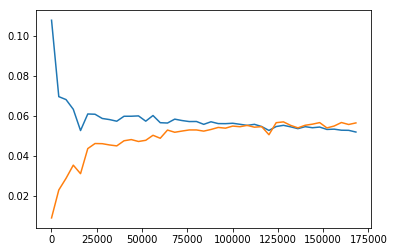

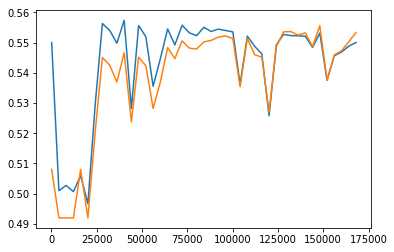

In [35]:
plt.plot(range(100, X_train6.shape[0], 4000), train_ks)
plt.plot(range(100, X_train6.shape[0], 4000), valid_ks)
plt.savefig('../reports/figures/nn_ks_learning_rate.png')
plt.show()
plt.plot(range(100, X_train6.shape[0], 4000), train_accuracy)
plt.plot(range(100, X_train6.shape[0], 4000), valid_accuracy)
plt.savefig('../reports/figures/nn_acc_learning_rate.png')
plt.show()

## Champ Indicators without Paired Win Rates

In [20]:
X_train7 = X_train6[champs]
X_validation7 = X_validation6[champs]

In [ ]:
model = Sequential()
model.add(Dense(100, activation='sigmoid', input_shape=(X_train7.shape[1],)))
model.add(Dense(50, activation='sigmoid'))
model.add(Dense(20, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train7, Y_train)
train_pred = model.predict(X_train7)
print("Train ks and gini: " + str(mpf.ks_gini(Y_train, train_pred[:,0])))
print("Train accuracy: " + str(mpf.correct_prediction_rate(Y_train, train_pred[:,0])))
valid_pred = model.predict(X_validation7)
print("Validation ks and gini: " + str(mpf.ks_gini(Y_validation, valid_pred[:,0])))
print("Validation accuracy: " + str(mpf.correct_prediction_rate(Y_validation, valid_pred[:,0])))

## Champ Indicators with Decayed Win Rates

In [29]:
X_train8 = X_train6[:]
X_validation8 = X_validation6[:]
for col in paired_wr_cols:
    X_train8[col] = wr.decayed_win_rate(X_train8[col], X_train[col[0:-3] + '_gp'], .1)
    X_validation8[col] = wr.decayed_win_rate(X_validation8[col], X_validation[col[0:-3] + '_gp'], .1)

Epoch 1/1
171284/171284 [==============================] - 16s 92us/step - loss: 0.2484
Train ks and gini: {'ks': 0.053735868486618654, 'gini': 0.037493723987588934}
Train accuracy: 0.5417318605357184
Validation ks and gini: {'ks': 0.057905023076097295, 'gini': 0.038934935556108934}
Validation accuracy: 0.54071427320337


In [36]:
thresholds = [(x/100) for x in range(53, 57)]
for t in thresholds:
    print("Train accuracy: " + str(mpf.correct_prediction_rate(Y_train, train_pred[:,0], t)))
    print("Validation accuracy: " + str(mpf.correct_prediction_rate(Y_validation, valid_pred[:,0], t)))

Train accuracy: 0.551586838233577
Validation accuracy: 0.5547965599985988
Train accuracy: 0.5529705051259896
Validation accuracy: 0.5565130576427934
Train accuracy: 0.5519312953924477
Validation accuracy: 0.5550943197940202
Train accuracy: 0.5504483781322248
Validation accuracy: 0.5526421803023138


In [38]:
train_ks = []
train_accuracy = []
valid_ks = []
valid_accuracy = []
decay_factors = [.002, .004, .006, .008] + [x/100 for x in range(1, 100, 5)]
for decay in decay_factors:
    print(str(decay) + ',', end='')
    X_train8 = X_train6[:]
    X_validation8 = X_validation6[:]
    for col in paired_wr_cols:
        X_train8[col] = wr.decayed_win_rate(X_train8[col], X_train[col[0:-3] + '_gp'], decay)
        X_validation8[col] = wr.decayed_win_rate(X_validation8[col], X_validation[col[0:-3] + '_gp'], decay)
    model = Sequential()
    model.add(Dense(100, activation='sigmoid', input_shape=(X_train8.shape[1],)))
    model.add(Dense(50, activation='sigmoid'))
    model.add(Dense(20, activation='sigmoid'))
    model.add(Dense(10, activation='sigmoid'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train8, Y_train, verbose=0)
    train_pred = model.predict(X_train8)
    train_ks.append(mpf.ks_gini(Y_train, train_pred[:,0])['ks'])
    train_accuracy.append(mpf.correct_prediction_rate(Y_train, train_pred[:,0]))
    valid_pred = model.predict(X_validation8)
    valid_ks.append(mpf.ks_gini(Y_validation, valid_pred[:,0]))
    valid_accuracy.append(mpf.correct_prediction_rate(Y_validation, valid_pred[:,0]))

0.002,0.004,0.006,0.008,0.01,0.06,0.11,0.16,0.21,0.26,0.31,0.36,0.41,0.46,0.51,0.56,0.61,0.66,0.71,0.76,0.81,0.86,0.91,0.96,

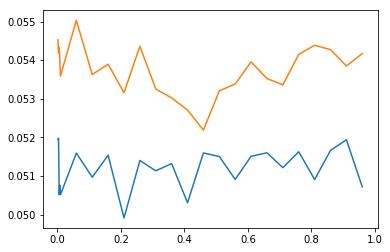

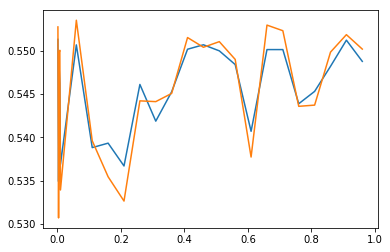

In [42]:
valid_ks = [x['ks'] for x in valid_ks]
plt.plot(decay_factors, train_ks)
plt.plot(decay_factors, valid_ks)
plt.savefig('../reports/figures/decay_factor_ks.png')
plt.show()
plt.plot(decay_factors, train_accuracy)
plt.plot(decay_factors, valid_accuracy)
plt.savefig('../reports/figures/decay_factor_acc.png')
plt.show()
decay_factor_analysis = pd.DataFrame({'train_ks': train_ks, 'valid_ks': valid_ks,
                                     'train_accuracy': train_accuracy, 'valid_accuracy': valid_accuracy},
                                    index=decay_factors)
decay_factor_analysis.to_csv('../reports/decay_factor_analysis.csv')